In [48]:
import csv
import os
import matplotlib.pyplot as plt 
import numpy as np

In [49]:
def load_data(dir):
    files = os.listdir(dir)
    data = {}
    for i in range(8):
        data[i] = []
    total_time = 0
    for f in files:
        with open(f'{dir}/{f}', newline='') as csvfile:
            reader = csv.reader(csvfile, delimiter=',')
            headers = []
            start = 0
            end = 0
            for (i, row) in enumerate(reader):
                if i == 0:
                    headers = row
                else:
                    sd = {}
                    for (j, header) in enumerate(headers):
                        if '.' in row[j]:
                            sd[header] = float(row[j])
                        else:
                            sd[header] = int(row[j])
                    data[sd['stage']].append(sd)

                    if i == 1:
                        start = sd['timestamp']
                    end = sd['timestamp']
            total_time += end - start
        print(f'Parsed {f}')
    return data, total_time
data, total_time = load_data('./data')

Parsed 10.3cm_1a_test1.csv
Parsed 10.3cm_1a_test2.csv
Parsed 10.3cm_2a_test1.csv
Parsed 10.3cm_2a_test2.csv
Parsed 10.3cm_3a_test3.csv
Parsed 10.3cm_3a_test4.csv
Parsed 10.3cm_test1.csv
Parsed 10.3cm_test2.csv
Parsed 10.3_3a_test5.csv
Parsed 14cm_1a_test1.csv
Parsed 14cm_2a_test1.csv
Parsed 14cm_3a_test1.csv
Parsed 14cm_3a_test2.csv
Parsed 18cm_1a_test1.csv
Parsed 18cm_2a_test1.csv
Parsed 18cm_3a_test1.csv
Parsed 18cm_3a_test2.csv
Parsed re10cm_1a_test1.csv
Parsed re10cm_2a_test1.csv
Parsed re10cm_3a_test1.csv
Parsed re14cm_1a_test1.csv
Parsed re14cm_3a_test1.csv
Parsed re18cm_1a_test1.csv
Parsed re18cm_2a_test1.csv
Parsed re18cm_3a_test1.csv


In [50]:
def average_ping():
    pings = [0 for _ in data.keys()]
    for (i, key) in enumerate(data.keys()):
        for sd in data[key]:
            pings[i] += sd['ping']
        pings[i] /= len(data[key])
    return pings

def num_packets():
    return [len(data[key]) for key in data.keys()]

Text(0.5, 1.0, 'Average Ping Between Base and Modules')

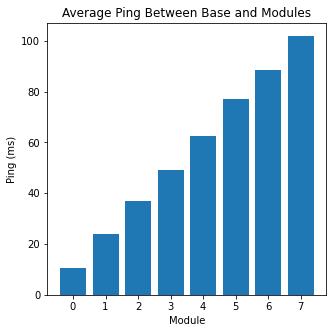

In [51]:
fig = plt.figure(figsize=(5, 5))
plt.bar(data.keys(), np.array(average_ping()) / 1000)
plt.ylabel("Ping (ms)")
plt.xlabel("Module")
plt.title("Average Ping Between Base and Modules")


In [52]:
slope, intercept = np.polyfit(list(data.keys()), np.array(average_ping()) / 1000, 1)
print(slope, intercept)

13.07164732054902 10.489856512984762


[3.66234008e-05 3.57148327e-05 3.51045935e-05 3.39248583e-05
 3.37139002e-05 3.26935153e-05 3.19506352e-05 2.91601946e-05]


Text(0.5, 1.0, 'State Messages Rate per Module')

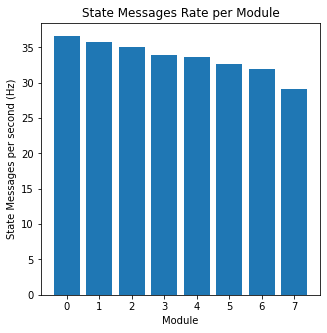

In [55]:
fig = plt.figure(figsize=(5, 5))
print(np.array(num_packets()) / total_time)
plt.bar(data.keys(), np.array(num_packets()) / (total_time / 1e6))
plt.ylabel("State Messages per second (Hz)")
plt.xlabel("Module")
plt.title("State Messages Rate per Module")
